<a href="https://colab.research.google.com/github/Akiyoshi-Yagi/deepLearning/blob/master/sumple_deepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
print(iris.data[:10])
print(iris.target[:10])
print(iris.data.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]
(150, 4)


In [7]:
from sklearn import preprocessing
from keras.utils import np_utils

#標準化（正規化したい場合はMinMaxScalerを使う！！！）
scaler = preprocessing.StandardScaler()
scaler.fit(iris.data)
x = scaler.transform(iris.data)
print(x[:10])

'''
Kerasはラベルを数値ではなく、
0or1を要素に持つベクトルで扱うらしい 
つまりあるサンプルに対するターゲットを「3」だとすると
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]みたいな感じにしなければならない。
ワンホット表現
'''
t = np_utils.to_categorical(iris.target)
print(t[:10])




[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [8]:
#全体のデータを訓練用とテスト用に分ける！
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)
print(x_train.shape)

(112, 4)


In [9]:
#モデルの構築

from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
#中間層１のニューロン
model.add(Dense(32, input_dim=4))
#活性化関数
model.add(Activation("relu"))
#中間層２のニューロン
model.add(Dense(32))
model.add(Activation("relu"))
#最後の層
model.add(Dense(3))
model.add(Activation("softmax"))
#コンパイル
model.compile(optimizer="sgd",loss="categorical_crossentropy",metrics=["accuracy"])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                160       
_________________________________________________________________
activation_10 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
activation_11 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 99        
_________________________________________________________________
activation_12 (Activation)   (None, 3)                 0         
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
____________________________________________________

In [10]:
#学習開始！！
history = model.fit(x_train, t_train, nb_epoch=30, batch_size=8)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/30




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.





112/112 [==============================] - 9s 83ms/step - loss: 0.9612 - acc: 0.7054
Epoch 2/30
112/112 [==============================] - 0s 455us/step - loss: 0.8868 - acc: 0.7679
Epoch 3/30
112/112 [==============================] - 0s 398us/step - loss: 0.8265 - acc: 0.7857
Epoch 4/30
112/112 [==============================] - 0s 400us/step - loss: 0.7732 - acc: 0.7946
Epoch 5/30
112/112 [==============================] - 0s 417us/step - loss: 0.7266 - acc: 0.7946
Epoch 6/30
112/112 [==============================] - 0s 465us/step - loss: 0.6848 - acc: 0.8036
Epoch 7/30
112/112 [==============================] - 0s 415us/step - loss: 0.6474 - acc: 0.8036
Epoch 8/30
112/112 [==============================] - 0s 412us/step - loss: 0.6129 - acc: 0.8125
Epoch 9/30
112/112 [==============================] - 0s 479us/step - loss: 0.5821 - acc: 0.8125
Epoch 10/30
112/112 [==============================] - 0s 416us/step - loss: 0.5538 - acc: 0.8214
Epoch 11/30
112/112 [=================

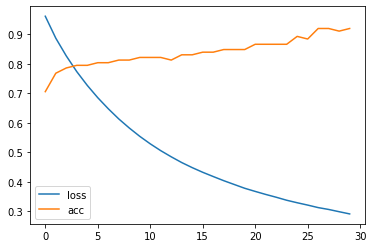

In [14]:
#学習の推移を視覚化
import matplotlib.pyplot as plt
hist_loss = history.history["loss"]
hist_acc = history.history["acc"]

plt.plot(np.arange(len(hist_loss)),hist_loss,label="loss")
plt.plot(np.arange(len(hist_acc)),hist_acc,label="acc")
plt.legend()
plt.show()

In [15]:
#評価
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)


38/38 [==============================] - 0s 1ms/step
0.2633237909329565 0.9210526315789473


In [16]:
#予測
model.predict(x_test)

array([[0.03472073, 0.39592555, 0.5693537 ],
       [0.94122493, 0.04945701, 0.0093181 ],
       [0.01056945, 0.08854505, 0.9008855 ],
       [0.00289161, 0.05412542, 0.94298303],
       [0.01216717, 0.08728817, 0.9005447 ],
       [0.9675481 , 0.02828202, 0.00416996],
       [0.02604681, 0.68399423, 0.2899589 ],
       [0.1019849 , 0.85704666, 0.04096837],
       [0.05318937, 0.34877077, 0.59803987],
       [0.965973  , 0.02900388, 0.00502312],
       [0.05253118, 0.7971898 , 0.1502791 ],
       [0.96155226, 0.03250102, 0.00594669],
       [0.06863351, 0.4084504 , 0.52291614],
       [0.9600201 , 0.03732433, 0.00265558],
       [0.04526683, 0.92640954, 0.02832361],
       [0.02245146, 0.21069922, 0.76684934],
       [0.09889276, 0.67362404, 0.22748312],
       [0.06951731, 0.50931984, 0.42116287],
       [0.02864259, 0.36173046, 0.60962695],
       [0.08266583, 0.56589806, 0.35143605],
       [0.08354622, 0.63369584, 0.28275797],
       [0.96395576, 0.03267106, 0.00337311],
       [0.

In [18]:
#学習したモデルの保存

from keras.models import load_model

model.save("model.tx")
load_model("model.tx")